<font size="5">**Projet 2 : Analysez des données de systèmes éducatifs**</font>

<font size="3">**Objectif du projet** :</font>

<font size="3">Déterminer les pays et les régions où développer l'entreprise
de formation en ligne</font> 

<font size="3">*Par Alexis Marceau*</font>

# Librairies et packages utilisés

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Commande permettant de lister les packages installés dans l'environnement virtuel actuel :

`conda list -n adsml`

# Visualisation des datasets et réorganisation

## Chargement des data

In [154]:
df_EdStatsData     = pd.read_csv('EdStatsData.csv', sep=',')
df_EdStatsCountry  = pd.read_csv('EdStatsCountry.csv', sep=',')

In [155]:
df_EdStatsCountrySeries = pd.read_csv('EdStatsCountry-Series.csv', sep=',')
df_EdStatsFootNote = pd.read_csv('EdStatsFootNote.csv', sep=',')
df_EdStatsSeries = pd.read_csv('EdStatsSeries.csv', sep=',')

## Visualisation des data

In [156]:
df_EdStatsCountry.head(1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN


In [157]:
df_EdStatsData.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df_EdStatsCountrySeries.head(1)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [159]:
df_EdStatsFootNote.head(1)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN


In [160]:
df_EdStatsSeries.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Shape et description des datasets

In [161]:
df_EdStatsCountry.shape

(241, 32)

In [162]:
df_EdStatsCountrySeries.shape

(613, 4)

In [163]:
df_EdStatsData.shape

(886930, 70)

In [164]:
df_EdStatsFootNote.shape

(643638, 5)

In [165]:
df_EdStatsSeries.shape

(3665, 21)

- EdStatsFootNote : indication sur la source des données, **643638 lignes, 5 colonnes**
- EdStatsCountry-Series : indication sur la source des données, **613 lignes, 4 colonnes**
- EdStatsCountry : contient la colonne "région" qui contient toutes les régions utiles pour notre étude, **24 lignes, 32 colonnes**
- EdStatsSeries : description de tous les indicateurs, **3665 lignes, 21 colonnes**
- EdStatsData : valeur en pourcentage des indicateurs par pays et par an, **886930 lignes, 70 colonnes**

## Extraction des régions, réorganisation du dataset principal : EdStatsData

### Extraction des régions

In [166]:
region = df_EdStatsCountry[['Region','Country Code']]

In [167]:
region = df_EdStatsCountry['Region'].unique()

In [168]:
region

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

### Réorganisation du dataset principal : EdStatsData

On souhaite garder uniquement les années après 1990. C'est l'année 
après la création d'internet, et c'est un critère déterminant pour 
notre étude de marché.

In [169]:
df = df_EdStatsData

In [170]:
df.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
to_drop = ['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','Country Code','Indicator Code','Unnamed: 69']
df.drop(to_drop, axis=1,inplace = True)

J'utilise `melt()` pour rassembler les valeurs de la colonne 'Years' en lignes

In [172]:
df = df.melt(id_vars =['Country Name','Indicator Name'], var_name ='Years', value_name ='valeur')

J'utilise `pivot()` pour que chaque indicateur devienne une colonne

In [173]:
df = df.pivot(index=['Country Name','Years'], columns='Indicator Name',values='valeur').reset_index().rename_axis(columns=None)

In [174]:
df.head(1)

,Country Name,Years,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,Afghanistan,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le dataframe est maintenant organisé de façon à avoir un indicateur par colonne, ce qui facilite ensuite le traitement.

In [175]:
df.dtypes

Country Name                                                                object
Years                                                                       object
Adjusted net enrolment rate, lower secondary, both sexes (%)               float64
Adjusted net enrolment rate, lower secondary, female (%)                   float64
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)    float64
                                                                            ...   
Youth illiterate population, 15-24 years, male (number)                    float64
Youth literacy rate, population 15-24 years, both sexes (%)                float64
Youth literacy rate, population 15-24 years, female (%)                    float64
Youth literacy rate, population 15-24 years, gender parity index (GPI)     float64
Youth literacy rate, population 15-24 years, male (%)                      float64
Length: 3667, dtype: object

In [176]:
df['Years'].unique()

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035',
       '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075',
       '2080', '2085', '2090', '2095', '2100'], dtype=object)

In [177]:
df['Years'] = df['Years'].astype(int)

### Nettoyage et création de deux dataframes : df_pays et df_region

Suppression des pays qui n'en sont pas et des régions pour le dataframe principal

In [178]:
country_to_remove = ['World','Low & middle income','Middle income','Low income',
                     'Lower middle income','Upper middle income','East Asia & Pacific (excluding high income)','High income',
                     'OECD members','Sub-Saharan Africa (excluding high income)','European Union','Least developed countries: UN classification',
                     'Latin America & Caribbean (excluding high income)','Euro area','Arab World']
region_to_remove = region
to_remove = [*country_to_remove, *region_to_remove]

In [179]:
df_pays = df[~df['Country Name'].isin(to_remove)]

On regarde si il y a des données duppliquées

In [180]:
df_pays.duplicated().sum()

0

Pas de valeurs dupliquées

In [181]:
df_pays.shape

(9900, 3667)

La dimension est maintenant de : **10387 lignes 3668 colonnes** pour le dataframe contenant les **pays**

3665 indicateurs + 3 colonnes (nom du pays, son code, et l'année de référence).

In [182]:
df_region = df[df['Country Name'].isin(region)]

In [183]:
df_region.duplicated().sum()

0

In [184]:
df_region.shape

(315, 3667)

La dimension est maintenant de : **329 lignes 3668 colonnes** pour le dataframe contenant les **régions**

## Recherche des indicateurs

### Proportion de données manquantes par indicateurs

In [185]:
df = df.loc[:, df.isnull().mean() < 0.9]

Je choisis les indicateurs suivants qui possèdent tous moins de 60% de valeurs manquantes :

- Internet users (per 100 people)
- GDP per capita (current US$) 
- Population, ages 15-24, total
- Population of the official age for upper secondary education, both sexes (number) 
- Population of the official age for tertiary education, both sexes (number)

In [186]:
indicateurs = [ 'Internet users (per 100 people)',
                'GDP per capita (current US$)',
                'Population, ages 15-24, total',
                'Population of the official age for upper secondary education, both sexes (number)',
                'Population of the official age for tertiary education, both sexes (number)']

<AxesSubplot:>

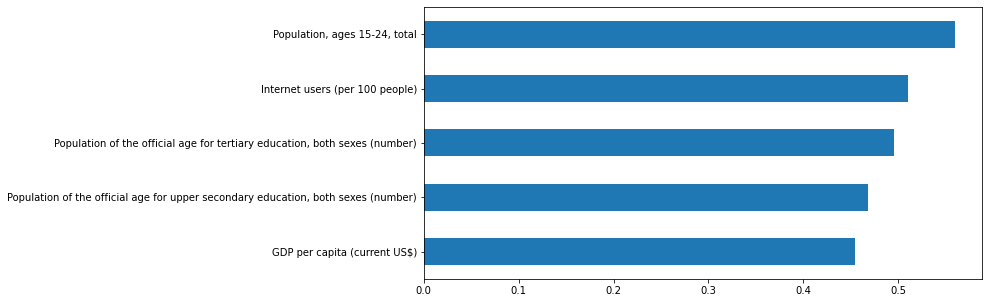

In [187]:
pd.set_option('display.max_rows',300)  #défini une limite de 200 lignes pour l'affichage
df[indicateurs].isnull().mean().sort_values(ascending=True).head(300).plot(kind="barh", figsize=(10, 5))

On filtre sur les dataframes pays et régions pour avoir uniquement nos indicateurs

### Sauvegarde des dataframes df_pays et df_region avec uniquement nos indicateurs sélectionnés

In [188]:
df_pays = df_pays[['Country Name','Years','Internet users (per 100 people)','GDP per capita (current US$)','Population, ages 15-24, total','Population of the official age for upper secondary education, both sexes (number)','Population of the official age for tertiary education, both sexes (number)']]
df_region= df_region[['Country Name','Years','Internet users (per 100 people)','GDP per capita (current US$)','Population, ages 15-24, total','Population of the official age for upper secondary education, both sexes (number)','Population of the official age for tertiary education, both sexes (number)']]

In [189]:
df_pays.shape

(9900, 7)

In [190]:
df_region.shape

(315, 7)

# Traitement sur les pays

## Taux de remplissage des indicateurs par années

In [191]:
df_na_per_years = (df_pays.groupby(['Years'])[indicateurs]
         .apply(lambda x: np.mean(x.isna().to_numpy(), axis=None))
         .reset_index(name='proportion indicateurs manquant par années'))

<AxesSubplot:xlabel='Years'>

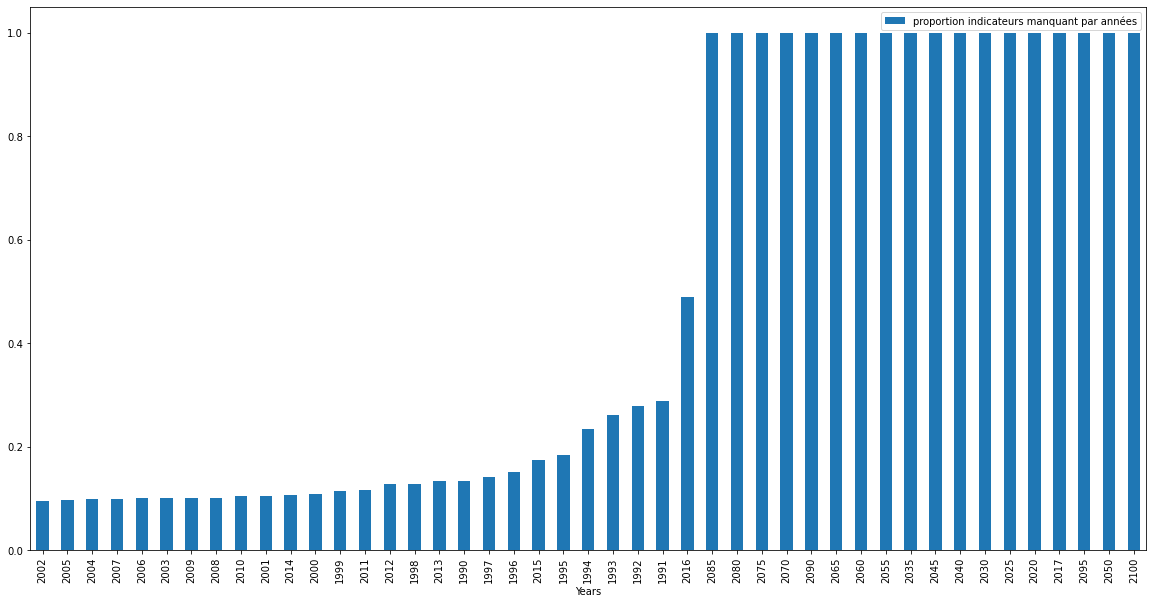

In [192]:
df_na_per_years.sort_values(by= 'proportion indicateurs manquant par années',ascending=True).set_index('Years').plot(kind="bar", figsize=(20, 10))

Je drop les années avec 100% de valeurs manquantes

In [193]:
df_na_per_years = df_na_per_years[df_na_per_years['proportion indicateurs manquant par années'] == 1]

In [194]:
drop_years = df_na_per_years['Years'].tolist()

In [195]:
df_pays= df_pays[~df_pays['Years'].isin(drop_years)]

## Taux de remplissage par pays

In [196]:
df_na_per_country = (df_pays.groupby(['Country Name'])[indicateurs]
         .apply(lambda x: np.mean(x.isna().to_numpy(), axis=None))
         .reset_index(name='proportion indicateurs manquant par pays'))

<AxesSubplot:ylabel='Country Name'>

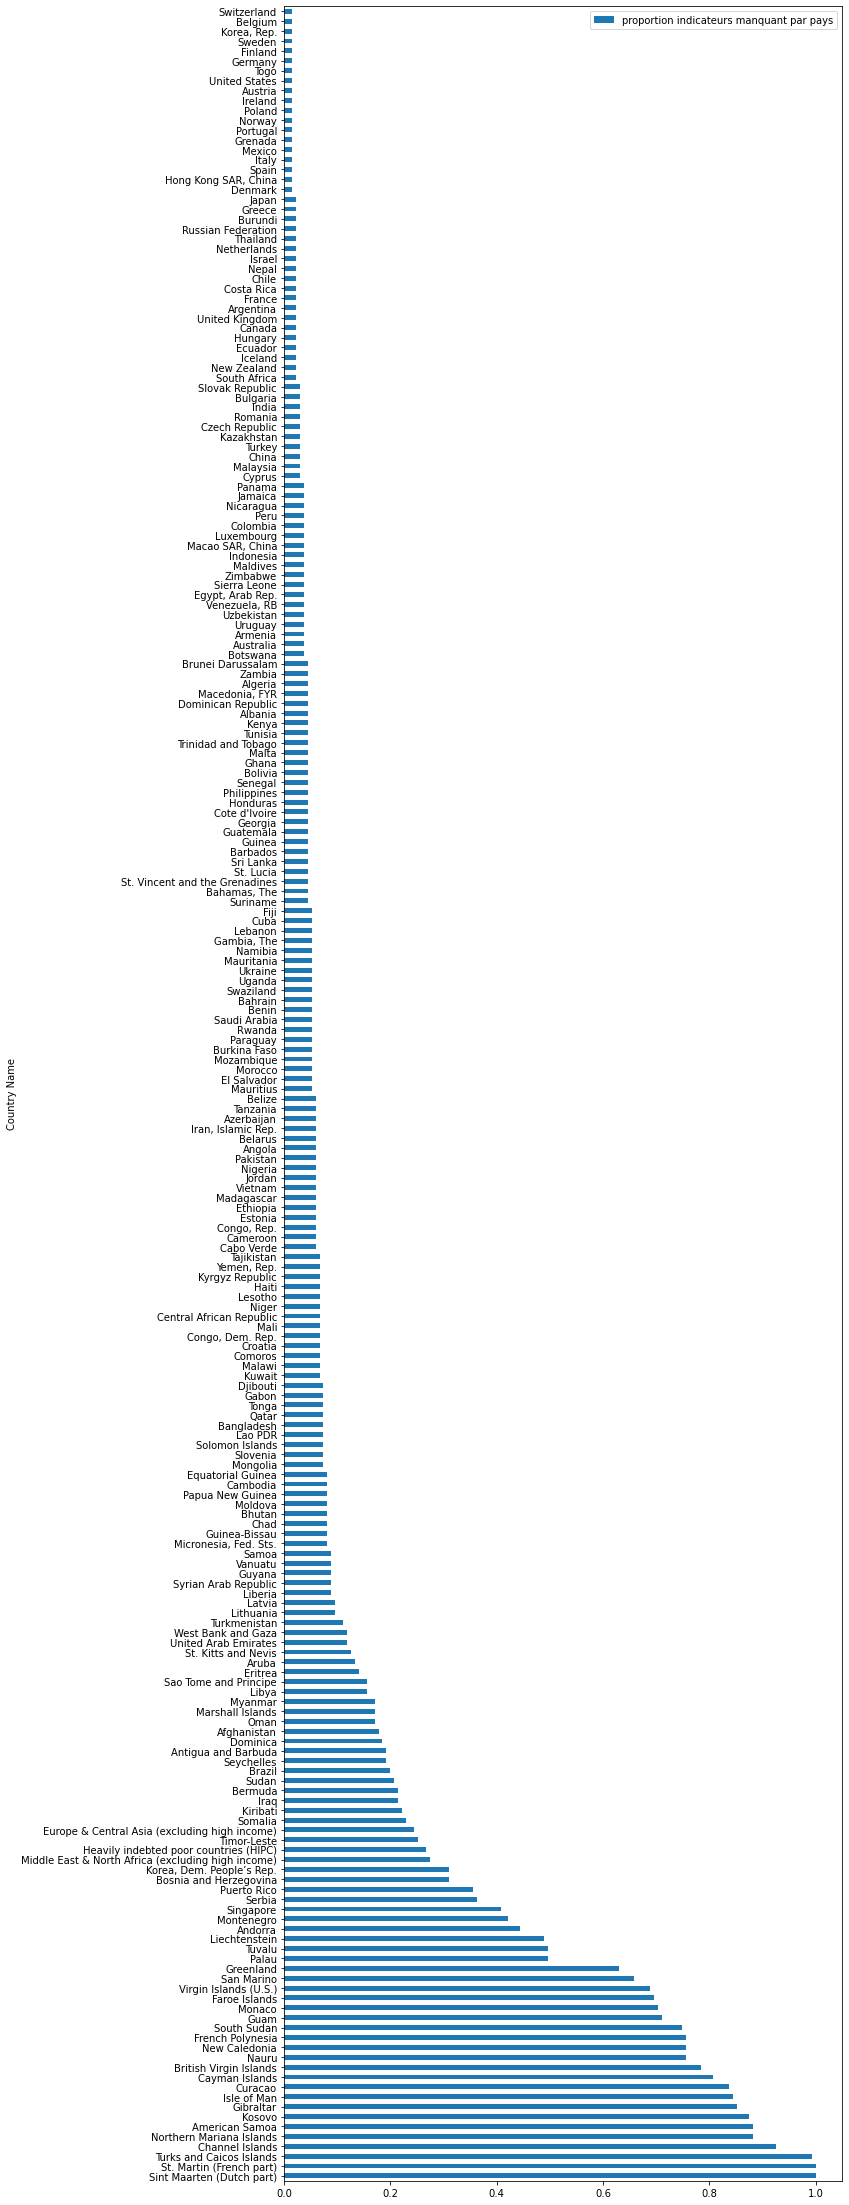

In [197]:
df_na_per_country.sort_values(by= 'proportion indicateurs manquant par pays',ascending=False).set_index('Country Name').plot(kind="barh", figsize=(10, 40))

## Focus sur l'année la plus récente avec le moins de valeurs manquantes : 2014

In [198]:
df_2014 = df_pays[df_pays['Years'] == 2014]

In [199]:
df_2014.dtypes

Country Name                                                                          object
Years                                                                                  int32
Internet users (per 100 people)                                                      float64
GDP per capita (current US$)                                                         float64
Population, ages 15-24, total                                                        float64
Population of the official age for upper secondary education, both sexes (number)    float64
Population of the official age for tertiary education, both sexes (number)           float64
dtype: object

In [200]:
df_2014 = df_2014.drop(['Years'], axis=1)

In [201]:
df_2014.head(1)

,Country Name,Internet users (per 100 people),GDP per capita (current US$),"Population, ages 15-24, total","Population of the official age for upper secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)"
24,Afghanistan,7.0,612.069651,7032072.0,2206482.0,3034517.0


In [202]:
df_2014.describe()

,Internet users (per 100 people),GDP per capita (current US$),"Population, ages 15-24, total","Population of the official age for upper secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)"
count,204.000000,200.000000,1.810000e+02,2.000000e+02,1.980000e+02
mean,45.617765,16415.445900,6.667586e+06,2.289690e+06,3.680393e+06
std,28.751135,24379.135610,2.418672e+07,8.647453e+06,1.278929e+07
min,0.990000,312.748979,1.425300e+04,3.930000e+02,8.680000e+02
25%,17.675000,2015.603992,4.925230e+05,7.657100e+04,1.381172e+05
50%,46.180000,6332.661303,1.320960e+06,3.563960e+05,6.069940e+05
75%,69.835000,19265.557980,5.087952e+06,1.310261e+06,2.434272e+06
max,98.160000,179308.075616,2.430027e+08,9.861326e+07,1.186815e+08


In [203]:
seuil_internet_2014 = df_2014['Internet users (per 100 people)'].mean()
seuil_GDP_2014 = df_2014['GDP per capita (current US$)'].mean()
seuil_pop_tertiary_2014 = df_2014['Population of the official age for tertiary education, both sexes (number)'].mean()
seuil_pop_secondary_2014 = df_2014['Population of the official age for upper secondary education, both sexes (number)'].mean()
seuil_pop_age_2014 = df_2014['Population, ages 15-24, total'].mean()

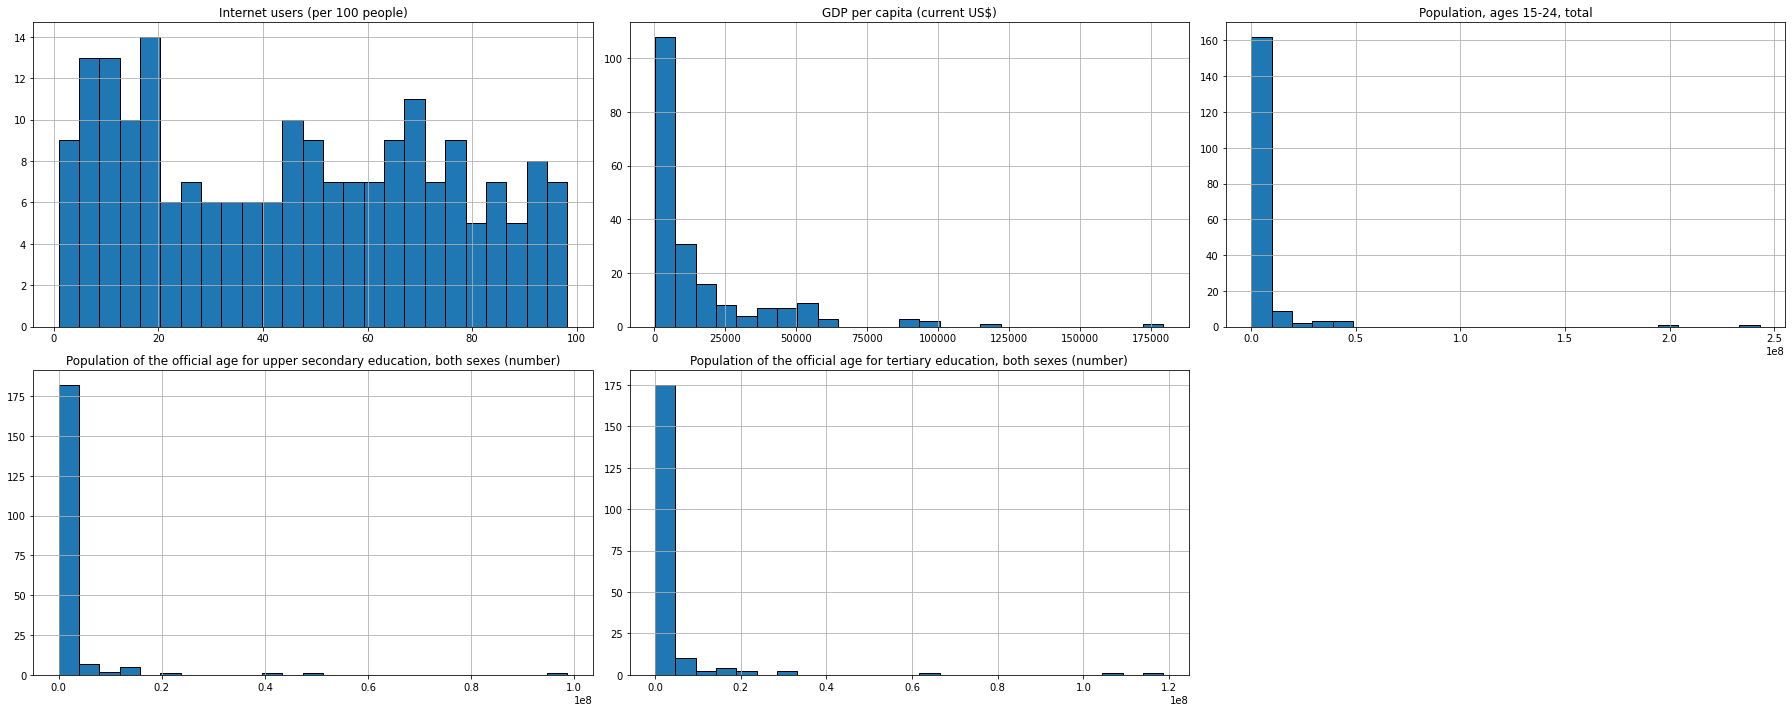

In [204]:
df_2014.hist(bins=25, figsize=(25, 10), layout=(-1, 3), edgecolor="black")
plt.tight_layout()

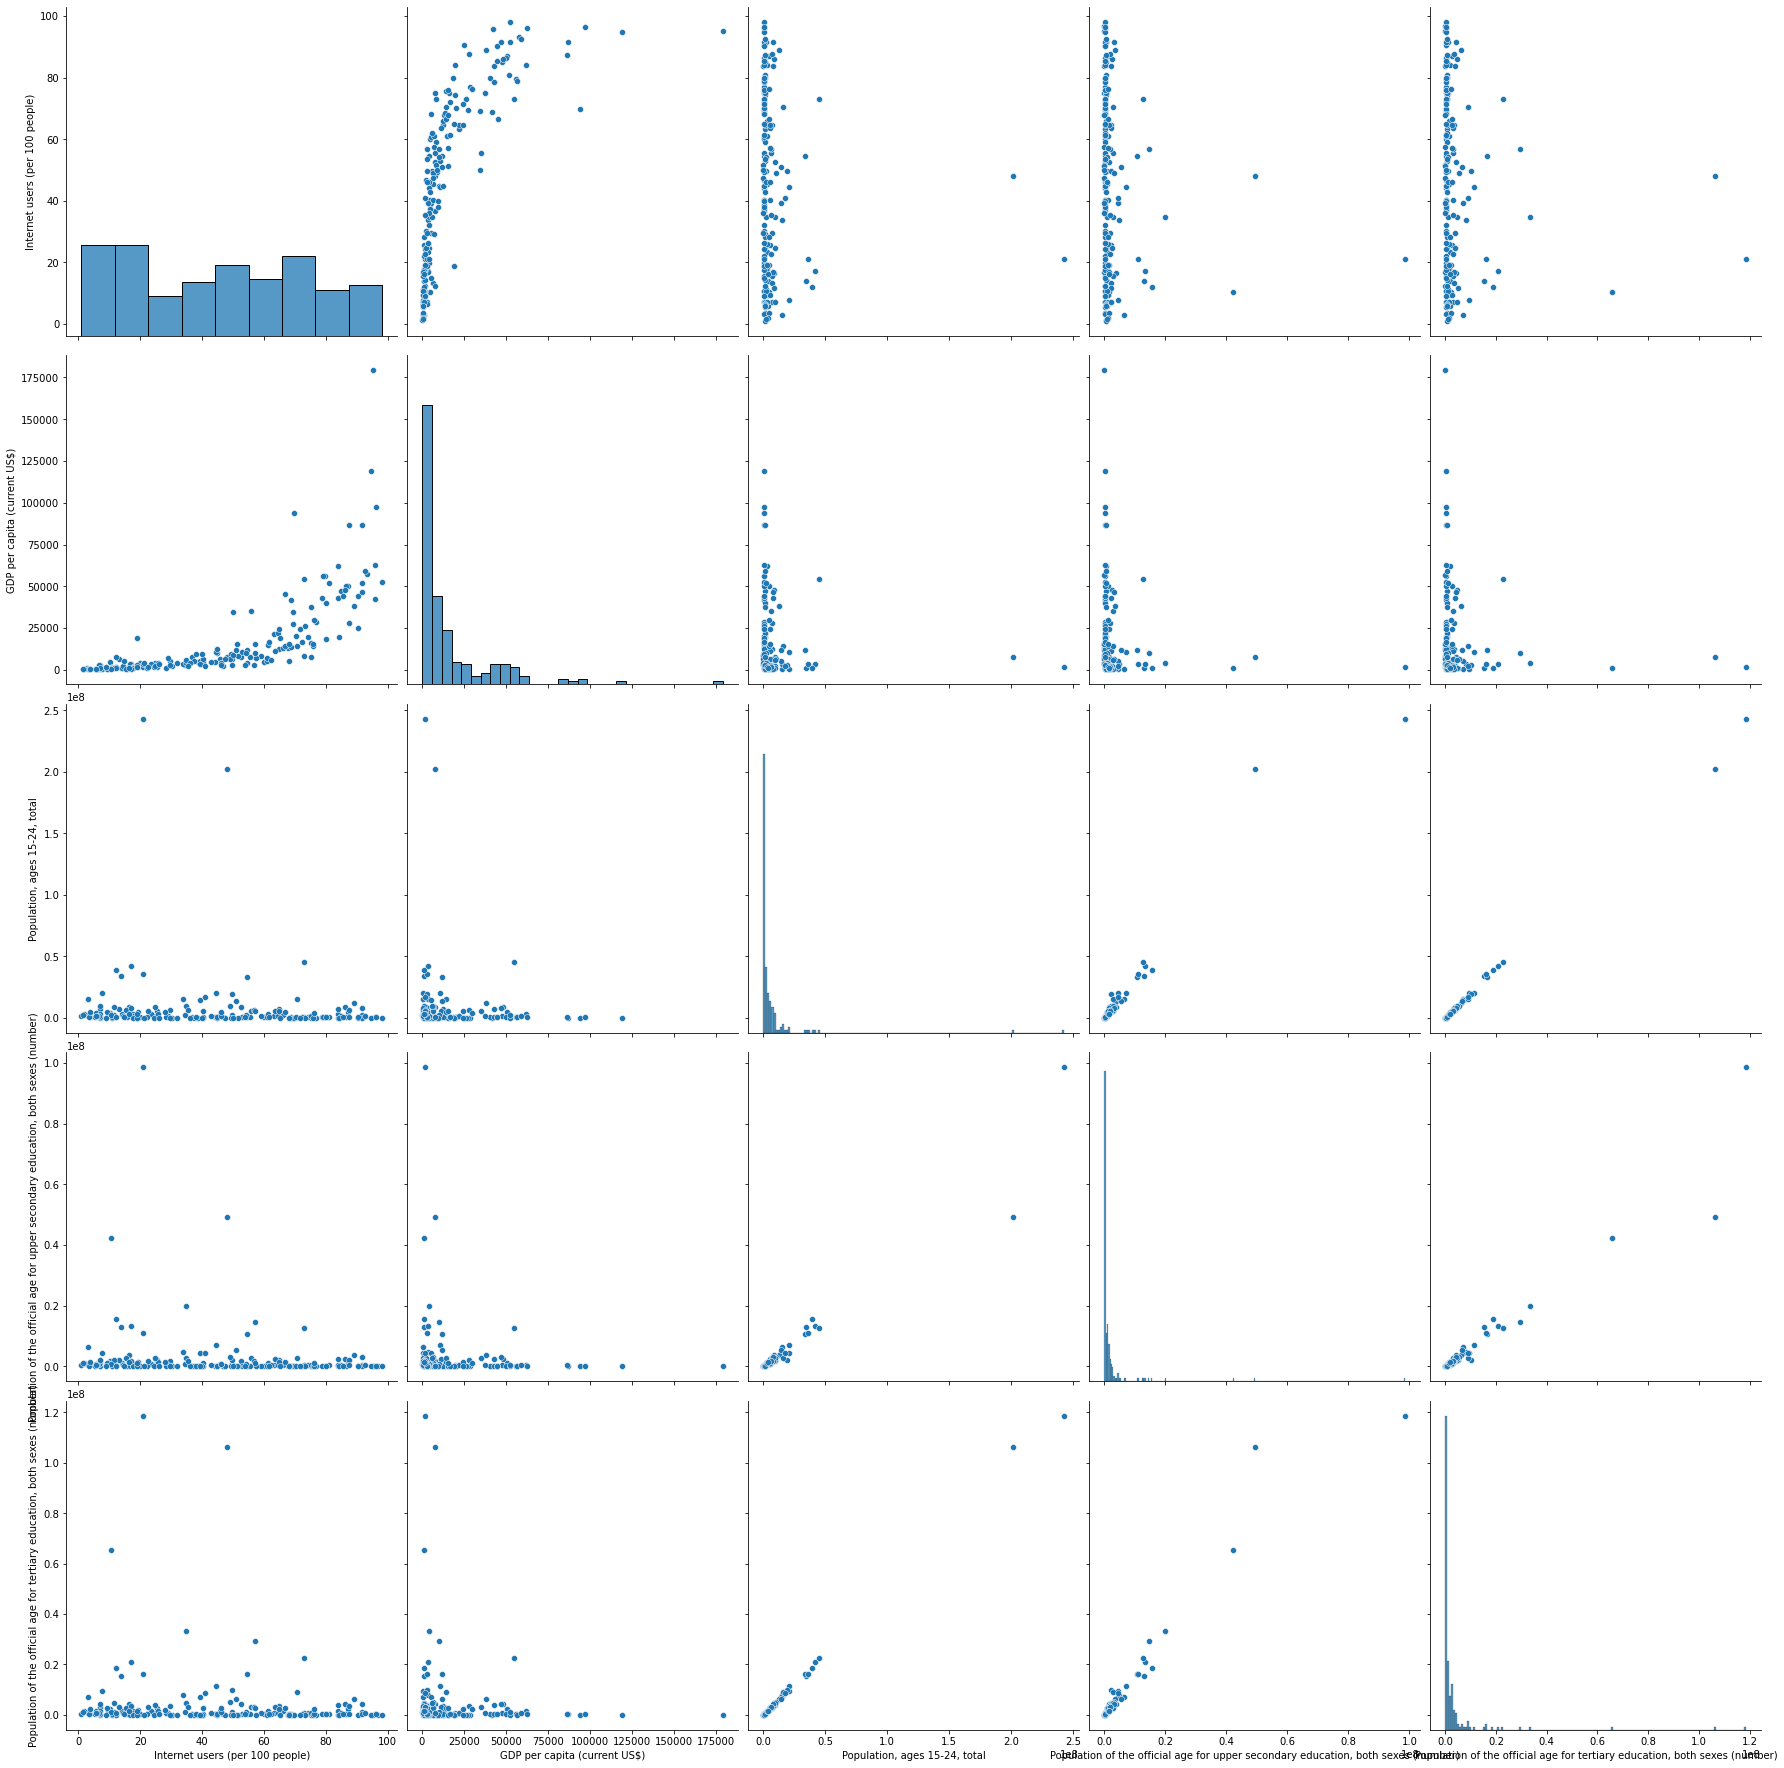

In [205]:
sns.pairplot(df_2014,height=5)

### Scores 2014

In [206]:
#Indicateurs de population
df_2014['SCORE_POP_AGE'] = df_2014['Population, ages 15-24, total'] / df_2014['Population, ages 15-24, total'].max()

#indicateurs education
df_2014['SCORE_POP_TERT'] = (df_2014['Population of the official age for tertiary education, both sexes (number)'] /
                             df_2014['Population of the official age for tertiary education, both sexes (number)'].max())

df_2014['SCORE_POP_UPPER'] = (df_2014['Population of the official age for upper secondary education, both sexes (number)'] / 
                             df_2014['Population of the official age for upper secondary education, both sexes (number)'].max())

df_2014['EDUCATION_SCORE'] = (df_2014['SCORE_POP_TERT']+df_2014['SCORE_POP_UPPER'])/2

#Indicateur économique
df_2014['SCORE_POP_GDP'] = df_2014['GDP per capita (current US$)'] / df_2014['GDP per capita (current US$)'].max()

#Indicateur internet
df_2014['SCORE_INTERNET'] = df_2014['Internet users (per 100 people)'] / df_2014['Internet users (per 100 people)'].max()

#Score total
df_2014['SCORE_TOTAL'] = (df_2014['EDUCATION_SCORE'] + df_2014['SCORE_POP_AGE']+df_2014['SCORE_POP_GDP']+df_2014['SCORE_INTERNET']) / 4

In [207]:
df_pays_seuil_2014 = df_2014[(df_2014['GDP per capita (current US$)'] > seuil_GDP_2014) & 
   (df_2014['Internet users (per 100 people)'] > seuil_internet_2014) & 
   (df_2014['Population of the official age for tertiary education, both sexes (number)'] > seuil_pop_tertiary_2014) &
   (df_2014['Population of the official age for upper secondary education, both sexes (number)']> seuil_pop_secondary_2014) &
   (df_2014['Population, ages 15-24, total']>seuil_pop_age_2014)]

In [208]:
df_2014_top = df_pays_seuil_2014.sort_values('SCORE_TOTAL', ascending=False).iloc[:10]

In [209]:
df_2014_top

,Country Name,Internet users (per 100 people),GDP per capita (current US$),"Population, ages 15-24, total","Population of the official age for upper secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)",SCORE_POP_AGE,SCORE_POP_TERT,SCORE_POP_UPPER,EDUCATION_SCORE,SCORE_POP_GDP,SCORE_INTERNET,SCORE_TOTAL
10329,United States,73.000000,54598.550689,45230846.0,12580923.0,22731736.0,0.186133,0.191536,0.127578,0.159557,0.304496,0.743684,0.348467
10284,United Kingdom,91.610000,46783.469217,7812258.0,3034726.0,4166196.0,0.032149,0.035104,0.030774,0.032939,0.260911,0.933272,0.314818
4794,Japan,89.106833,38096.211505,12211081.0,3601205.0,6095805.0,0.050251,0.051363,0.036518,0.043941,0.212462,0.907771,0.303606
3579,Germany,86.190000,48042.563435,8819364.0,2466622.0,4447891.0,0.036293,0.037478,0.025013,0.031245,0.267933,0.878056,0.303382


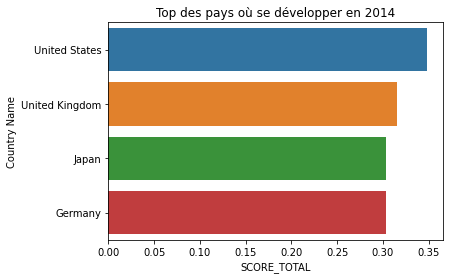

In [210]:
ax = sns.barplot(x="SCORE_TOTAL", y="Country Name", data=df_2014_top)
ax.set_title('Top des pays où se développer en 2014')
plt.show()

In [211]:
liste_pays_top = df_2014_top['Country Name'].tolist()

## Potentiel d'évolution par pays

In [212]:
#Indicateurs de population
df_pays['SCORE_POP_AGE'] = df_pays['Population, ages 15-24, total'] / df_pays['Population, ages 15-24, total'].max()

#indicateurs éducation
df_pays['SCORE_POP_TERT'] = df_pays['Population of the official age for tertiary education, both sexes (number)'] / df_pays['Population of the official age for tertiary education, both sexes (number)'].max()
df_pays['SCORE_POP_UPPER'] = df_pays['Population of the official age for upper secondary education, both sexes (number)'] / df_pays['Population of the official age for upper secondary education, both sexes (number)'].max()
df_pays['EDUCATION_SCORE'] = (df_pays['SCORE_POP_TERT']+df_pays['SCORE_POP_UPPER'])/2

#Indicateur économique
df_pays['SCORE_POP_GDP'] = df_pays['GDP per capita (current US$)'] / df_pays['GDP per capita (current US$)'].max()

#Indicateur internet
df_pays['SCORE_INTERNET'] = df_pays['Internet users (per 100 people)'] / df_pays['Internet users (per 100 people)'].max()

#Score total
df_pays['SCORE_TOTAL'] = (df_pays['EDUCATION_SCORE'] + df_pays['SCORE_POP_AGE']+df_pays['SCORE_POP_GDP']+df_pays['SCORE_INTERNET']) / 4

In [213]:
df_pays = df_pays[df_pays['Country Name'].isin(liste_pays_top)]

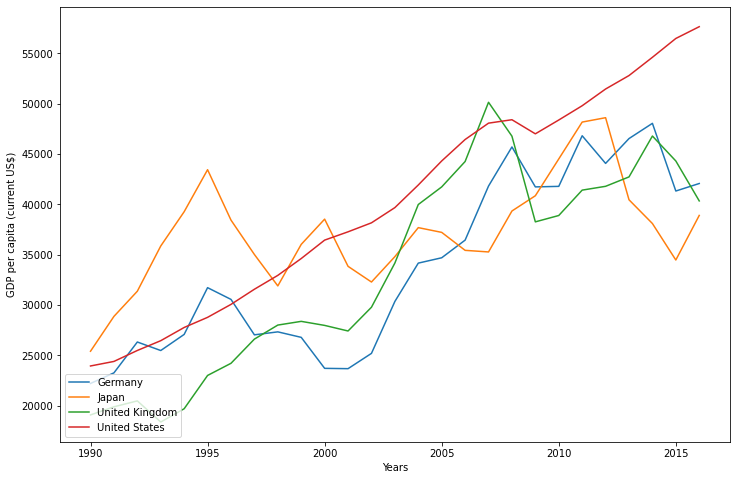

In [226]:
plt.figure(figsize=(12,8))
lineplot = sns.lineplot(data=df_pays, 
             x="Years", 
             y="GDP per capita (current US$)",
             hue="Country Name",
             )
plt.legend(loc='lower left')
#plt.yscale('log') 
plt.show()

In [215]:
df_internet = df_pays[df_pays["Years"] >= 2000]

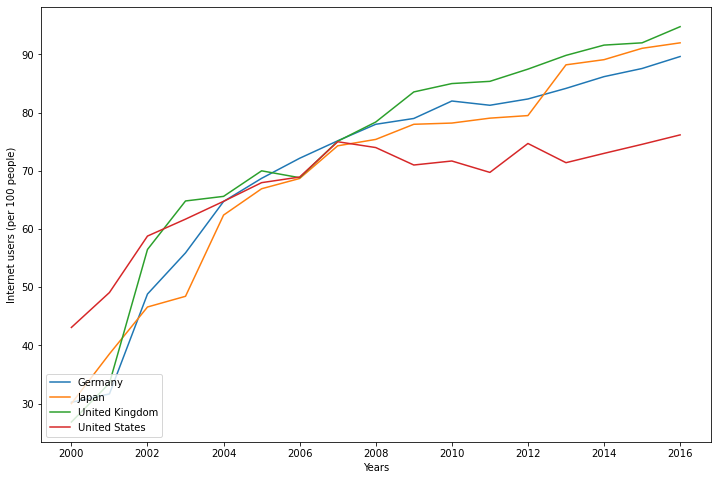

In [216]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_internet, 
             x="Years", 
             y="Internet users (per 100 people)",
             hue="Country Name",
             )
plt.legend(loc='lower left')
plt.show()

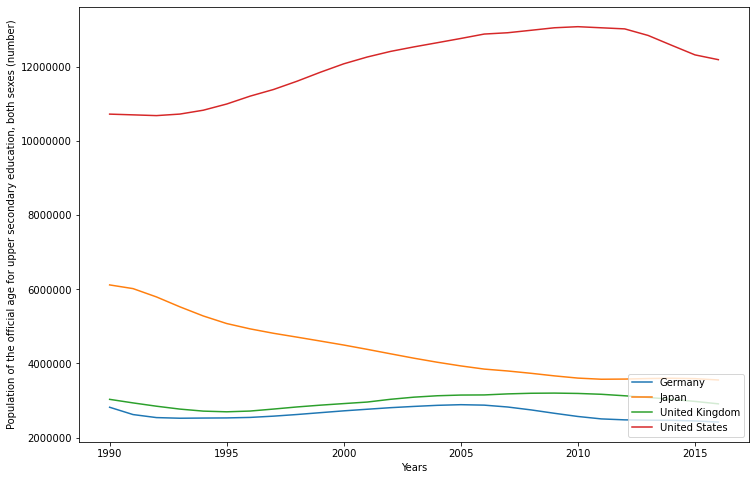

In [217]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_pays, 
             x="Years", 
             y="Population of the official age for upper secondary education, both sexes (number)",
             hue="Country Name",
             )
plt.legend(loc='lower right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

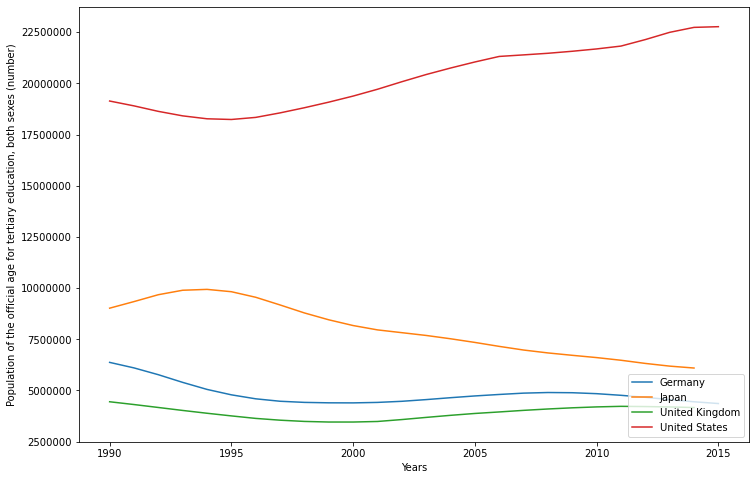

In [218]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_pays, 
             x="Years", 
             y="Population of the official age for tertiary education, both sexes (number)",
             hue="Country Name",
             )
plt.legend(loc='lower right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

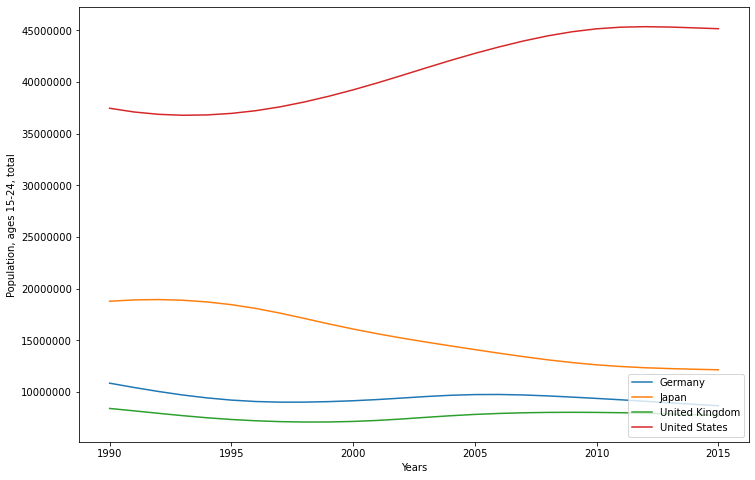

In [219]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_pays, 
             x="Years", 
             y="Population, ages 15-24, total",
             hue="Country Name",
             )
plt.legend(loc='lower right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Focus sur les régions

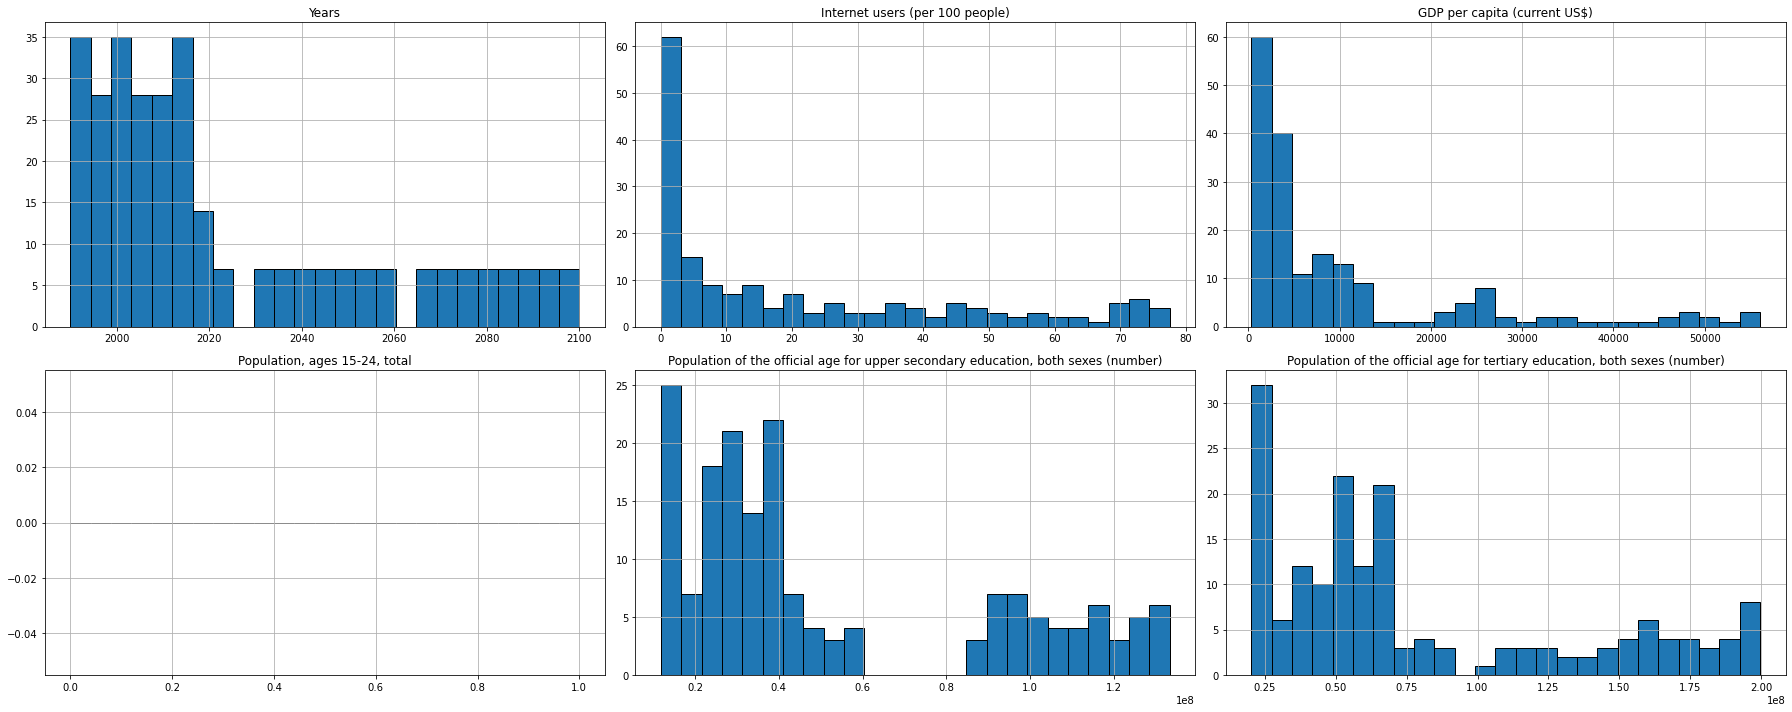

In [220]:
df_region.hist(bins=25, figsize=(25, 10), layout=(-1, 3), edgecolor="black")
plt.tight_layout()

In [221]:
df_region.sample(5)

,Country Name,Years,Internet users (per 100 people),GDP per capita (current US$),"Population, ages 15-24, total","Population of the official age for upper secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)"
7344,North America,1999,35.882480,33397.980910,NaN,13089800.0,21119094.0
8894,South Asia,2025,NaN,NaN,NaN,NaN,NaN
6484,Middle East & North Africa,1994,NaN,2269.483215,NaN,19487436.0,25558864.0
8874,South Asia,1999,0.226317,434.184716,NaN,115232608.0,127788472.0
2618,East Asia & Pacific,1998,1.882787,3423.174263,NaN,94934056.0,168642016.0


In [222]:
df_region.describe()

,Years,Internet users (per 100 people),GDP per capita (current US$),"Population, ages 15-24, total","Population of the official age for upper secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)"
count,315.000000,175.000000,189.000000,0.0,1.750000e+02,1.750000e+02
mean,2024.844444,20.827840,10653.681148,NaN,5.239209e+07,7.915930e+07
std,31.951266,23.934821,13768.115178,NaN,3.801630e+07,5.511353e+07
min,1990.000000,0.000000,308.962951,NaN,1.183489e+07,2.021887e+07
25%,2001.000000,1.092401,1557.330641,NaN,2.485490e+07,3.876879e+07
50%,2012.000000,9.753068,4286.504025,NaN,3.654139e+07,6.102611e+07
75%,2045.000000,35.566139,11721.093286,NaN,9.321431e+07,1.183233e+08
max,2100.000000,77.540410,56081.944482,NaN,1.333664e+08,1.995997e+08


In [223]:
df_region.drop('Population, ages 15-24, total', axis=1, inplace=True)

In [224]:
#Indicateurs éducation
df_region['SCORE_POP_TERT'] = (df_region['Population of the official age for tertiary education, both sexes (number)'] / 
                               df_region['Population of the official age for tertiary education, both sexes (number)'].max())
                               
df_region['SCORE_POP_UPPER'] = (df_region['Population of the official age for upper secondary education, both sexes (number)']  / 
                                df_region['Population of the official age for upper secondary education, both sexes (number)'].max())
                               
df_region['EDUCATION_SCORE'] = (df_region['SCORE_POP_TERT']+df_region['SCORE_POP_UPPER'])/2

#Indicateur économique
df_region['SCORE_POP_GDP'] = df_region['GDP per capita (current US$)'] / df_region['GDP per capita (current US$)'].max()

#Indicateur internet
df_region['SCORE_INTERNET'] = df_region['Internet users (per 100 people)'] / df_region['Internet users (per 100 people)'].max()

#Score total
df_region['SCORE_TOTAL'] = (df_region['EDUCATION_SCORE'] +df_region['SCORE_POP_GDP']+df_region['SCORE_INTERNET']) / 3

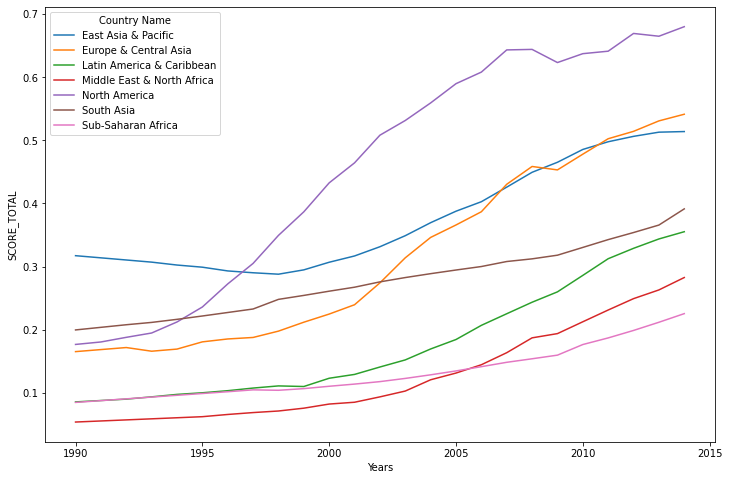

In [225]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_region, 
             x="Years", 
             y="SCORE_TOTAL",
             hue="Country Name",
             )
plt.show()